# Linear Discremination Analysis

# Load Library

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import  datasets


# Load Dataset

In [64]:
dataobj = datasets.load_wine()

In [65]:
X = pd.DataFrame(dataobj.data, columns=list(dataobj.feature_names))
X.head(10)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0
9,13.86,1.35,2.27,16.0,98.0,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045.0


In [66]:
y = pd.DataFrame(dataobj.target, columns=['target'])
y.head(10)

,target
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [67]:
df = pd.concat([X, y], axis=1)
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


# Split data

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7, random_state=1, stratify=y)

# Standardized

In [69]:
scl = StandardScaler()
X_s = scl.fit_transform(X)

# LDA

In [70]:
## max component of LDA = nuber of class - 1
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [71]:
n_components = 2
lda = LDA(n_components=n_components)

In [72]:
lda.fit(X_s, y)

/Users/jessadakorn/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearDiscriminantAnalysis(n_components=2)

In [73]:
## Transformation metrix
w = lda.scalings_
dw = pd.DataFrame(data=w, index=X.columns, columns=[f'nu_{i}' for i in range(1, n_components+1)])
dw

,nu_1,nu_2
alcohol,-0.326569,0.705754
malic_acid,0.184094,0.340194
ash,-0.100969,0.641759
alcalinity_of_ash,0.515503,-0.487473
magnesium,-0.030813,-0.006591
total_phenols,0.385720,-0.020104
flavanoids,-1.654628,-0.490054
nonflavanoid_phenols,-0.185636,-0.202407
proanthocyanins,0.076533,-0.175270
color_intensity,0.820805,0.585410


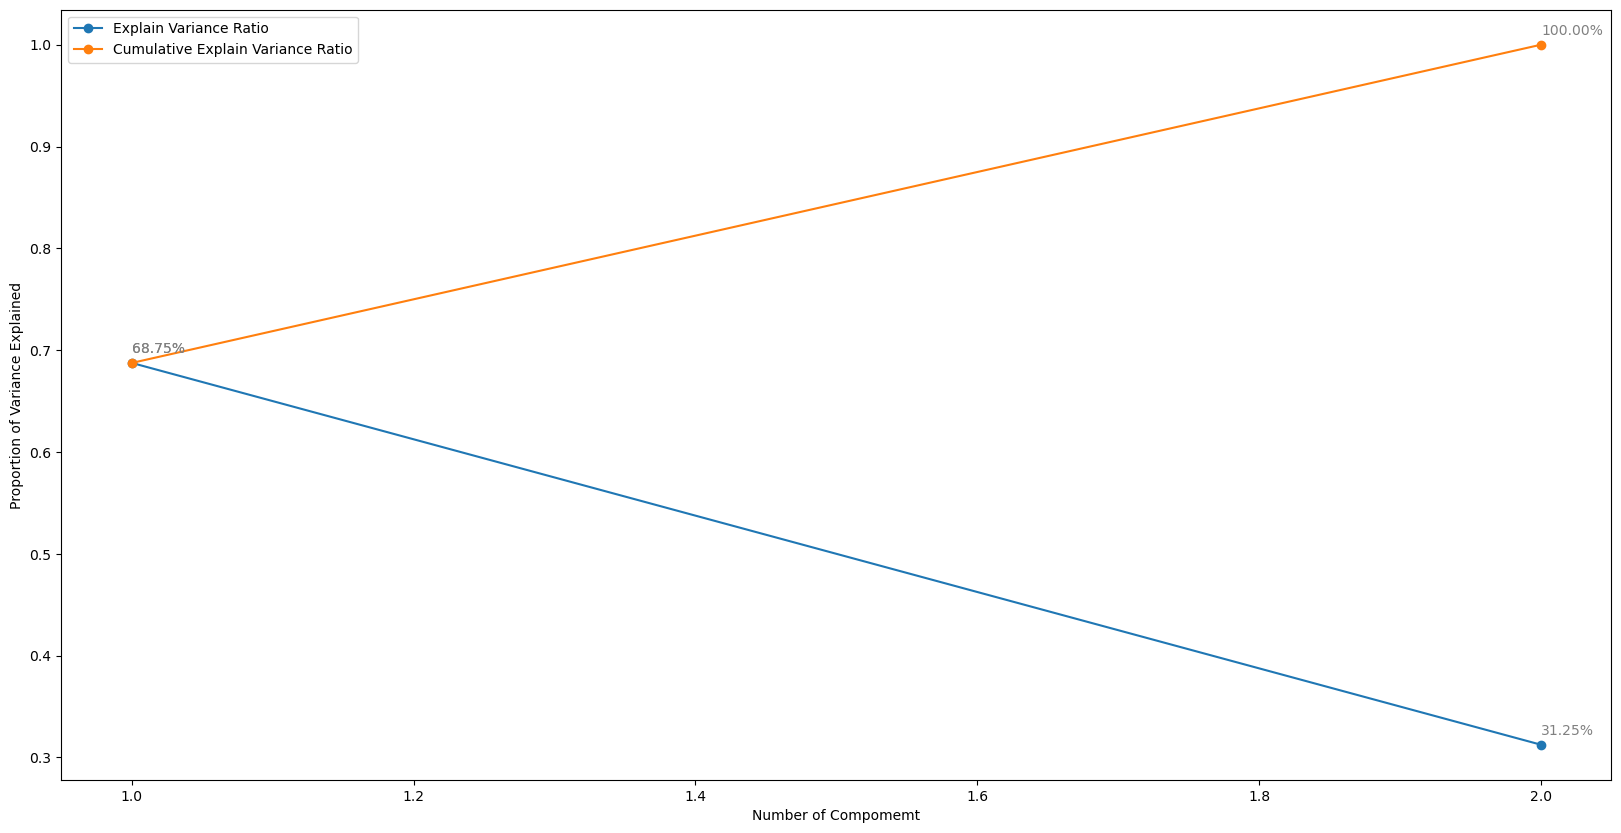

In [75]:
## Explained variance ratio
x = np.arange(1, n_components + 1)
y1 = lda.explained_variance_ratio_
y2 = np.cumsum(y1)
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(x, y1,label='Explain Variance Ratio', marker='o')
ax.plot(x, y2, label='Cumulative Explain Variance Ratio', marker='o')
ax.set_xlabel('Number of Compomemt')
ax.set_ylabel('Proportion of Variance Explained')

for x, y1, y2 in zip(x, y1, y2):
    ax.text(x, y1+.01, f'{y1*100:.2f}%', color='.5')
    ax.text(x, y2+.01, f'{y2*100:.2f}%', color='.5')
ax.legend();


In [76]:
# Transform data
X_lda = lda.transform(X_s)
X_lda = pd.DataFrame(X_lda, columns=['nu_1', 'nu_2'])
dr = pd.concat([X_lda, pd.DataFrame(y, columns=['target'])], axis=1)

<Axes: xlabel='nu_1', ylabel='nu_2'>

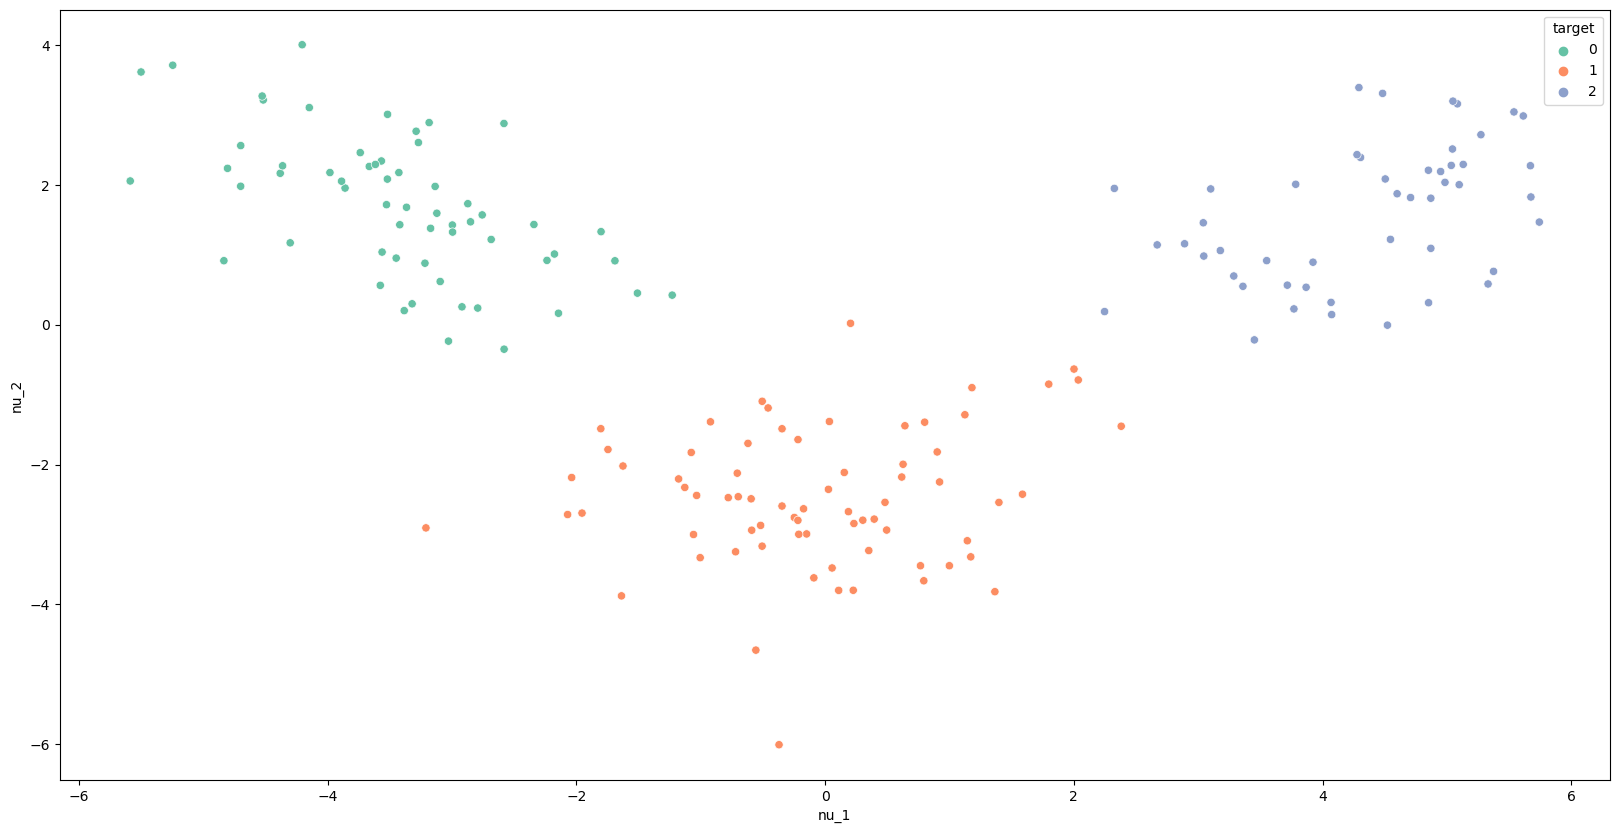

In [78]:
## ploting result
fig, ax = plt.subplots(figsize=(20, 10))
sns.scatterplot(data=dr, x='nu_1', y='nu_2', hue='target', palette='Set2')